<a href="https://colab.research.google.com/github/god05212/Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사용한 데이터셋
> Chest X-Ray Images (Pneumonia)

- Paul Mooney
- https://www.kaggle.com/paultimothymooney
- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
- Data: https://data.mendeley.com/datasets/rscbjbr9sj/2
- License: CC BY 4.0
- Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

# 1.LOADING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/archive.zip" -d "/content/drive/MyDrive"

In [ ]:
from pathlib import Path
# 데이터 directory의 경로를 정의합니다.
dir_alldata = Path('/content/drive/MyDrive/chest_xray/chest_xray')

In [ ]:
# train directory 경로
train_data_dir = dir_alldata / 'train'

# validation directory 경로
validation_data_dir = dir_alldata / 'val'

# test directory 경로
test_data_dir = dir_alldata / 'test'

# 일반 및 폐렴 하위 directory의 경로를 가져옵니다
normal_cases_train = train_data_dir / 'NORMAL'
pneumonia_cases_train = train_data_dir / 'PNEUMONIA'

데이터 확장(Data Augmentation)  
- 과대 적합이 일어나는 이유 중 하나는 훈련 데이터가 부족하기 때문이다.
- 훈련 데이터가 충분히 많다면 과대적합을 줄일 수 있다.
- 데이터 확장이라 훈련 데이터를 다양하게 변형하여 변형된 새로운 훈련 데이터처럼 사용함으로써 마치 훈련 데이터 수가 늘어난 효과를 얻는다.


In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 150,150
nb_train_sample =1000
nb_validation_samples =100

# 전체 dataset에 대해 50번 학습한다.
epochs = 50

# batch가 갖는 데이터의 개수 = 20
batch_size = 20

# 이미지 데이터 전처리
if K.image_data_format()=="channels_first":
    input_shape =(3,img_width, img_height) # (channels, rows, cols)
else:
    input_shape =(img_width, img_height,3) # (rows, cols, channels)

# 데이터 확장(Data Augmentation)
# rescale: 원본 영상은 0 ~ 255의 RGB로 구성되는데, 1/255로 스케일링하여 0 ~ 1 범위로 변환시켜줍니다.
# shear_range: 랜덤하게 전단 변환을 적용할 각도 범위입니다. shear_range = 0.2는 0.2 라디안 내외로 시계 반대 방향으로 이미지를 변환시키겠다는 의미입니다.
# zoom_range: 랜덤하게 사진을 확대할 범위입니다. 1 - zoom_range ~ 1 + zoom_range 사이로 확대 또는 축소가 됩니다. zoom_range = 0.2는 0.8에서 1.2 배의 크기로 이미지를 변환시키겠다는 의미입니다.
# horizontal_flip=True (이미지 좌우 반전)
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# target_size : 추후에 설계할 모델에 들어갈 인풋 이미지 사이즈 중 Width, Height를 입력
# batch_size : 이미지 데이터 원본 소스에서 한 번에 얼마만큼의 이미지 데이터를 가져올 것인지
# 'binary' : 'binary_crossentropy' 처럼 이진 분류 클래스로, 0 또는 1인 형태
train_generator= train_datagen.flow_from_directory(train_data_dir, target_size =(150,150),batch_size=batch_size, class_mode="binary" )

validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# 2.DATA VISUALIZATION

시각화와 관련된 단계는 다음과 같습니다.
- 무작위로 일반 사진을 볼 것입니다.  
- 무작위로 폐렴 사진을 볼 것입니다.  
- 긍정 사례와 부정 사례의 수를 표시합니다.  

> 데이터 셋에서 세 개의 랜덤 일반 사진

Printing three Normal random images 
NORMAL2-IM-0360-0001.jpeg
IM-0077-0001.jpeg
IM-0028-0001.jpeg


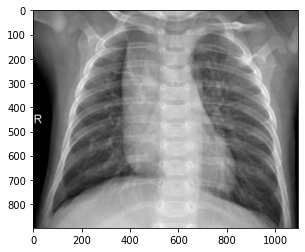

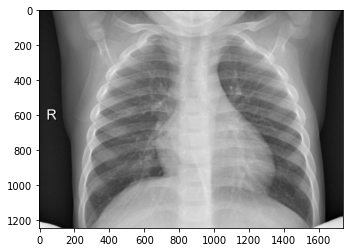

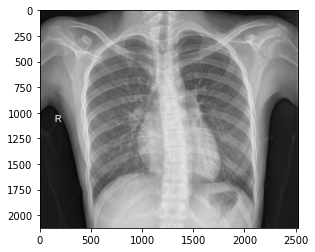

In [ ]:
# 데이터 셋에서 세 개의 랜덤 일반 사진
import os, random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
folder_N=r"/content/drive/MyDrive/chest_xray/test/NORMAL"

a=random.choice(os.listdir(folder_N))
b=random.choice(os.listdir(folder_N))
c=random.choice(os.listdir(folder_N))
print("Printing three Normal random images ")
print(a)
print(b)
print(c)

random_N = [a, b, c]

for i in random_N:
    file = folder_N +'/'+ i
    img = image.load_img(file)
    plt.figure() # plt.figure()를 입력해야지 각각의 캔버스에 나눠서 출력됩니다.
    plt.imshow(img)
    plt.show()

Printing three Normal random images 
person69_virus_129.jpeg
person1_virus_11.jpeg
person133_bacteria_637.jpeg


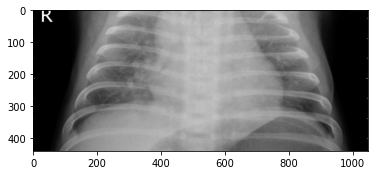

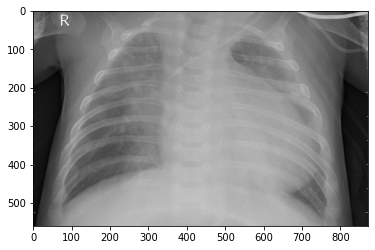

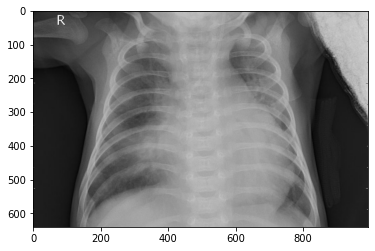

In [ ]:
# 데이터 셋에서 세 개의 랜덤 폐렴 사진
folder_N2=r"/content/drive/MyDrive/chest_xray/test/PNEUMONIA"

a=random.choice(os.listdir(folder_N2))
b=random.choice(os.listdir(folder_N2))
c=random.choice(os.listdir(folder_N2))
print("Printing three Normal random images ")
print(a)
print(b)
print(c)

random_N = [a, b, c]

for i in random_N:
    file = folder_N2+'/'+i
    img = image.load_img(file)
    plt.figure()
    plt.imshow(img)
    plt.show() 

> 데이터 셋에는 의료 전문가가 라벨을 붙입니다. 따라서 일반인이 해독하기 어렵지만 횡격막 주변의 경계선의 뚜렷함 여부가 결정적인 요인이 될 수 있을 것 같습니다. 그럼에도 불구하고, 예외가 있을 것으로 보입니다. 그러므로 이 진단은 주관적인 문제로 보고, Convnet을 통해 살펴볼 예정입니다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Positive (0) and Negative Cases (1)')

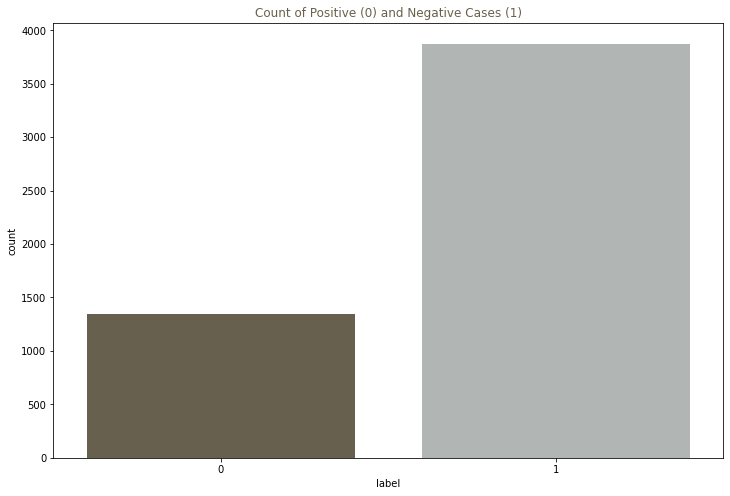

In [ ]:
import pandas as pd
import seaborn as sns
# countplot으로 표시하기 위해 데이터 셋을 pandas dataframe으로 변경합니다.
# 모든 이미지 목록을 가져옵니다.
normal = normal_cases_train.glob('*.jpeg')
pneumonia = pneumonia_cases_train.glob('*.jpeg')

# 빈 list입니다. 데이터를 (img_path, label) 형식으로 이 목록에 삽입합니다.
train_df = []

# 정상적인 경우를 모두 살펴보면 이러한 경우의 레이블은 0입니다.
for img in normal:
    train_df.append((img,0))

# 폐렴인 경우를 모두 살펴보면 이러한 경우의 레이블은 1입니다.
for img in pneumonia:
    train_df.append((img,1))

# list에 있는 data를 pandas dataframe로 가져옵니다.
train_df = pd.DataFrame(train_df, columns=['image', 'label'],index=None)

# 데이터를 섞습니다.
train_df = train_df.sample(frac=1.).reset_index(drop=True)

# 데이터 프레임을 countplot으로 보여줍니다.
plt.figure(figsize=(12,8))
count = sns.countplot(train_df["label"], palette=["#6B614B","#B0B7B5"])
count.set_title("Count of Positive (0) and Negative Cases (1)", color="#6B614B")

> 데이터 불균형이 있습니다. 폐렴 X-Ray 사진의 수가 일반 X-Ray 사진의 수보다 많습니다.

# 3.MODEL BUILDING

이 프로젝트에서 우리는 Convolutional neural network를 구축합니다.

모델 구축에는 다음 단계로 진행됩니다.
- Convnet을 초기화
- layers를 추가하여 정의
- Convnet을 컴파일
- Convnet을 train

드롭아웃(Dropout)
- 학습하는 동안에만 적용(학습 사이클마다 랜덤하게 일부 유닛만 사용하여 학습)  
  *학습(epoch) = 순전파 + 역전파 ; 에러를 고쳐나가는 것
- 예측할 때는 모든 유닛을 사용

In [ ]:
#모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D

# 입력층
# 특징추출부 START
model = Sequential() # Sequential 모델 객체를 생성한다
model.add(Conv2D(32,(3,3),input_shape=input_shape)) # 첫번째 인자: 컨볼루션 필터의 수, 들어온 데이터에서 찾을 특징의 갯수(Dense에서의 units과 비슷한 역할)
                                                    # 두번째 인자: 컨볼루션 커널의 (행, 열), input_shape:  입력 데이터 형태. 영상일 경우(행, 열, 채널 수)로 정의
model.add(Activation("relu")) # 모델에 레이어를 추가하는데, relu 활성화 함수로 지정한다.
model.add(MaxPool2D(pool_size=(2,2))) # 4개(2,2)의 데이터에서 가장 도드라지는 특징 1개만 가져옴(나머지는 삭제)
                                      # 특징이 많이 없고 많은 것을 버려야 할 경우 (N,M) 숫자를 크게 해주면 됨
# 중간층
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
# 특징추출부 END (2차원)

# 2차원 → 1차원 변환
model.add(Flatten())
# 분류부 START (1차원)
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5)) # 과대적합 완화하기 위해 사용. 전체 유닛(노드) 중 50프로를 사용 안함.
model.add(Dense(units = 1, activation = 'sigmoid')) # 이진분류이기 때문

model.summary() # 모델의 형태와 정보에 대해서 출력

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
# 모델학습방식을 정의함
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# 모델 학습시키기
# 확장 시킨 generator로 fit
history = model.fit(train_generator, steps_per_epoch=nb_train_sample//batch_size, epochs=epochs,validation_data=validation_generator, validation_steps=nb_validation_samples//batch_size)

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 0.5763 - accuracy: 0.7490

50/50 [==============================] - 272s 4s/step - loss: 0.5763 - accuracy: 0.7490 - val_loss: 0.6610 - val_accuracy: 0.6250
Epoch 2/50
50/50 [==============================] - 160s 3s/step - loss: 0.4088 - accuracy: 0.8080
Epoch 3/50
50/50 [==============================] - 135s 3s/step - loss: 0.3320 - accuracy: 0.8470
Epoch 4/50
50/50 [==============================] - 100s 2s/step - loss: 0.3250 - accuracy: 0.8534
Epoch 5/50
50/50 [==============================] - 88s 2s/step - loss: 0.2688 - accuracy: 0.8960
Epoch 6/50
50/50 [==============================] - 72s 1s/step - loss: 0.2742 - accuracy: 0.8750
Epoch 7/50
50/50 [==============================] - 61s 1s/step - loss: 0.2997 - accuracy: 0.8790
Epoch 8/50
50/50 [==============================] - 52s 1s/step - loss: 0.2795 - accuracy: 0.8950
Epoch 9/50
50/50 [==============================] - 43s 858ms/step - loss: 0.2538 - accuracy: 0.8990
Epoch 10/50
50/50 [==============================] - 39s 767ms/step - loss: 0.27

> 과대적합을 피하기 위해 데이터 확장(Data Augmentation)과 드롭아웃(Dropout)을 적용하였습니다.

# 4.CONCLUSION

다음과 같은 단계로 모델을 마무리합니다.
- test set에서 테스트합니다.
- Accuracy를 평가합니다.

In [11]:
# 모델 평가하기
test_accuracy = model.evaluate(test_generator)

32/32 [==============================] - 152s 5s/step - loss: 0.4116 - accuracy: 0.8894


In [12]:
print('The accuracy on test set :',test_accuracy[1]*100 )

The accuracy on test set : 88.94230723381042
